<a href="https://colab.research.google.com/github/tarachandaniheena/LogisticRegression/blob/main/customer_reviews_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.6 MB/s eta 0:00:00


In [2]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [3]:
pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.5 MB/s eta 0:00:00


In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

# **Instantiate Model**

In [5]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [6]:
tokens = tokenizer.encode('This is amazing', return_tensors='pt')
tokens[0]

tensor([  101, 10372, 10127, 39854,   102])

In [7]:
result = model(tokens)

In [8]:
int(torch.argmax(result.logits))+1

5

In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv('customer_reviews.csv')

In [21]:
df = pd.DataFrame(np.array(data[['Review Text','Rating']]),columns=['review', 'rating'])
df.head()

,review,rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [22]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1


In [24]:
df_limited = df.head(10000)

In [25]:
df_limited['sentiment'] = df_limited['review'].apply(lambda x:sentiment_score(str(x)[:512]))

<ipython-input-25-555a6b851b6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limited['sentiment'] = df_limited['review'].apply(lambda x:sentiment_score(str(x)[:512]))


In [30]:
df_limited_bottom = df.tail(13486)

In [32]:
df_limited_bottom['sentiment'] = df_limited_bottom['review'].apply(lambda x:sentiment_score(str(x)[:512]))

<ipython-input-32-39b970a732be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limited_bottom['sentiment'] = df_limited_bottom['review'].apply(lambda x:sentiment_score(str(x)[:512]))


In [28]:
df_limited.tail()

,review,rating,sentiment
9995,"This dress is quite adorable - the pattern, sl...",4,4
9996,Love this dress! bodice and lace at bottom giv...,5,5
9997,The cut is perfect and the rose color is so pr...,5,4
9998,I love this shirt so i bought both colors. i w...,5,5
9999,I adore this top! it's comfortable and cute. t...,5,5


In [33]:
df_limited_bottom.head(10)

,review,rating,sentiment
10000,"This t is a beautiful color, and i wish it had...",3,2
10001,This dress is my new favorite! the style is tr...,5,5
10002,Citizens of humanity jeans are excellent!!! i ...,5,5
10003,"Could not wait to try this on when it arrived,...",5,4
10004,"This is a charming dress, with lots of quality...",4,3
10005,There aren't enough great words to describe th...,5,5
10006,Great pop of color (i purchased the rosy color...,5,5
10007,I really wanted to love this dress! the qualit...,3,2
10008,I purchased the mauve dress from an retailer s...,5,5
10009,It lays very nicely on your body. very flatter...,4,4


In [36]:
sentiment_df = df_limited.append(df_limited_bottom)

<ipython-input-36-5d31bb31bc7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = df_limited.append(df_limited_bottom)


In [37]:
sentiment_df.shape

(23486, 3)

In [38]:
sentiment_df.head()

,review,rating,sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,5
1,Love this dress! it's sooo pretty. i happene...,5,5
2,I had such high hopes for this dress and reall...,3,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5,5
4,This shirt is very flattering to all due to th...,5,5


In [ ]:
df_limited['review'].iloc[72]

"I have a short torso and this works well for me. 34c, bought the 0. there's not much stretch to the fabric so it is fitted to my chest, but not in an uncomfortable way. definitely doesn't hang and have extra fabric like on the model. \r\n\r\nzipper goes almost all the way down to the bottom so it's easier to get on and off which makes up for the lack of stretch n the fabric.\r\n\r\nunlike another reviewer, i found it went really well with navy pants and i wore it to a business meeting under a blazer. wi"

Compare results with sentiment.polarity
https://docs.google.com/spreadsheets/d/1y5mLbrDEDQvfhO4fV12Xna7LCwLG_w29qPMXvBVdiXA/edit#gid=2126323537


In [53]:
sentiment_df['rating_category'] = pd.cut(sentiment_df['rating'], bins = [1,3,5], labels = ["Bad","Good"])
sentiment_df['sentiment_category'] = pd.cut(sentiment_df['sentiment'], bins = [1,3,5], labels = ["Bad","Good"])


In [44]:
df_limited.head()

,review,rating,sentiment,rating_category,sentiment_category
0,Absolutely wonderful - silky and sexy and comf...,4,5,Good,Good
1,Love this dress! it's sooo pretty. i happene...,5,5,Good,Good
2,I had such high hopes for this dress and reall...,3,3,Bad,Bad
3,"I love, love, love this jumpsuit. it's fun, fl...",5,5,Good,Good
4,This shirt is very flattering to all due to th...,5,5,Good,Good


In [56]:
sentiment_df.dropna(inplace=True)

In [57]:
sentiment_df.shape

(21551, 5)

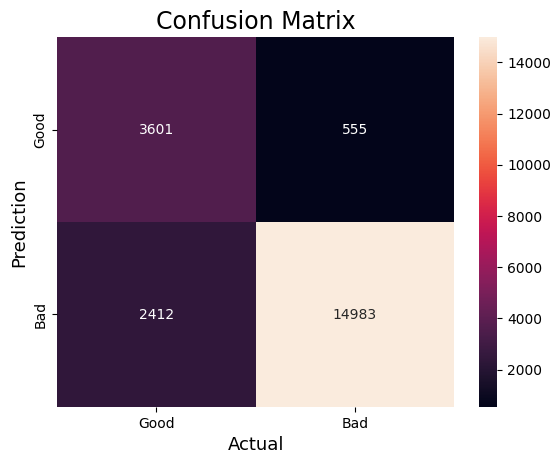

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(sentiment_df['rating_category'],sentiment_df['sentiment_category'])

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good','Bad'],
            yticklabels=['Good','Bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  precision_recall_curve,roc_curve


accuracy = accuracy_score(sentiment_df['rating_category'], sentiment_df['sentiment_category'])
print("Accuracy   :", accuracy)
precision = precision_score(sentiment_df['rating_category'], sentiment_df['sentiment_category'],average="binary", pos_label="Good")

print("Precision :", precision)
recall = recall_score(sentiment_df['rating_category'], sentiment_df['sentiment_category'] ,average="binary", pos_label="Good")
print("Recall    :", recall)
F1_score = f1_score(sentiment_df['rating_category'], sentiment_df['sentiment_category'],average="binary", pos_label="Good")
print("F1-score  :", F1_score)

Accuracy   : 0.8623265741728922
Precision : 0.9642811172609087
Recall    : 0.8613394653636103
F1-score  : 0.9099079950201925


In [77]:
sentiment_df['rating_category'].value_counts()

Good    17395
Bad      4156
Name: rating_category, dtype: int64

In [78]:
sentiment_df['sentiment_category'].value_counts()

Good    15538
Bad      6013
Name: sentiment_category, dtype: int64

In [83]:
sentiment_df.to_csv('review_sentiment.csv')

In [91]:
sentiment_df = pd.read_csv('review_sentiment.csv')


In [92]:
sentiment_df['rating_category'] = sentiment_df['rating_category'].replace(['Good','Bad'], [1,0])
sentiment_df['sentiment_category'] = sentiment_df['sentiment_category'].replace(['Good','Bad'], [1,0])

In [93]:
sentiment_df.head(100)

,Unnamed: 0,review,rating,sentiment,rating_category,sentiment_category
0,0,Absolutely wonderful - silky and sexy and comf...,4,5,1,1
1,1,Love this dress! it's sooo pretty. i happene...,5,5,1,1
2,2,I had such high hopes for this dress and reall...,3,3,0,0
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,5,1,1
4,4,This shirt is very flattering to all due to th...,5,5,1,1
...,...,...,...,...,...,...
95,103,The fabric felt cheap and i didn't find it to ...,2,2,0,0
96,104,"Runs big and looked unflattering. i am petite,...",2,2,0,0
97,105,I bought this lovely silk/velvet shirt in the ...,5,4,1,1
98,106,Was so excited to order this beautiful shirt! ...,4,2,1,0


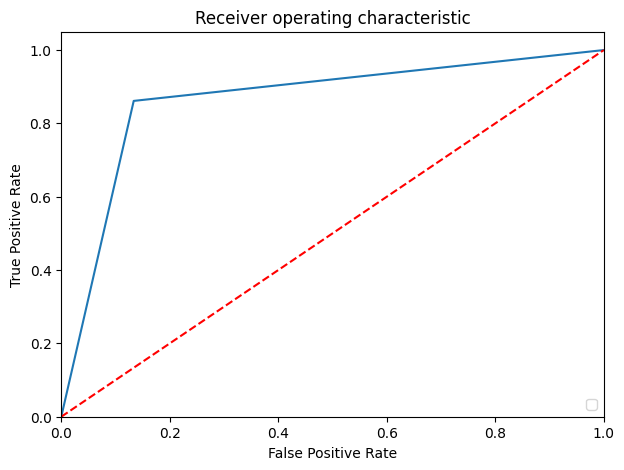

In [97]:
fpr, tpr, thresholds = roc_curve(sentiment_df['rating_category'], sentiment_df['sentiment_category'] )
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [98]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

1


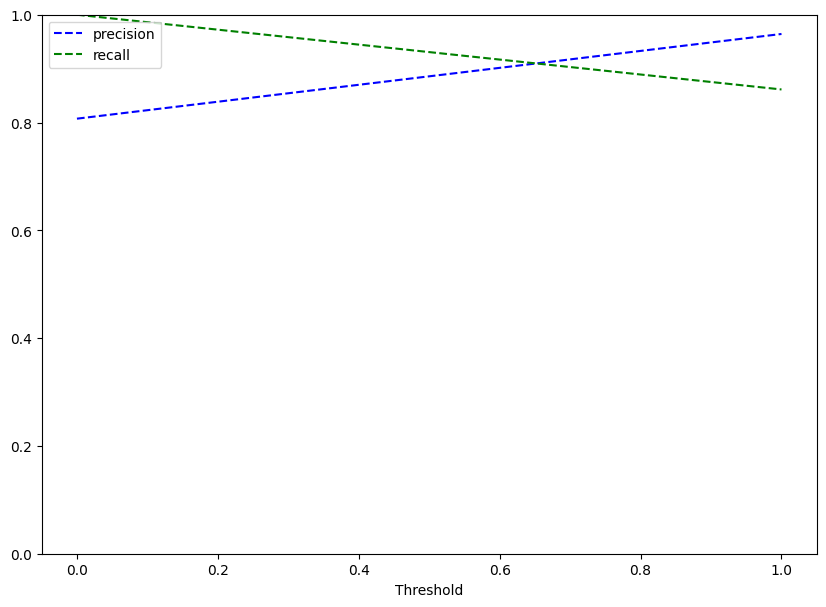

In [99]:
prec, rec, tre = precision_recall_curve(sentiment_df['rating_category'], sentiment_df['sentiment_category'] )


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()